In [32]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
import seaborn as sns
#importing the custome data handler
from data_handler.data_handler import DataHandler
from grid_search import *
from bayes_search import *

In [33]:
class LinearSVMClassifier:
    def __init__(self,C=1,Kernel="linear"):
        self.data_handler = DataHandler()
        self.model=SVC(C=1,kernel=Kernel)
    #loads the training data from the data handler as features and targets from the cleaned training data
    def load_train_data(self):
        print("Splitting training data into features and target variables")
        self.train_features,self.train_targets = self.data_handler.split_data(self.data_handler.train_data)
    
    #loads the validation data from the data handler as features and targets from the cleaned validation data
    def load_validation_data(self):
        print("Splitting validation data into features and target variables")
        self.validation_features,self.validation_targets = self.data_handler.split_data(self.data_handler.validation_data)
    
    #loads the test data from the data handler as features and targets from the cleaned test data
    def load_test_data(self):
        print("Splitting testing data into features and target variables")
        self.test_features,self.test_targets = self.data_handler.split_data(self.data_handler.test_data)
    
    #trains the model on the training data
    def train(self):
        print("Training the model with training data set")
        self.model.fit(self.train_features,self.train_targets)
    
    #predict the target for given features and returns the predicted targets use to predict the test data
    def predict(self,features):
        print("Predicting target varaibles using the features provided")
        return self.model.predict(features)
    
    #evaluates the model on the validation data
    def evaluate(self,DataFlag="Validation"):
        print("Evaluating the model's performance for {} dataset".format(DataFlag))
        if DataFlag=="Validation":
            features = self.validation_features
            targets = self.validation_targets
        elif DataFlag=="Test":
            features = self.test_features
            targets = self.test_targets
        predictions = self.predict(features)
        print("Accuracy: ",accuracy_score(targets,predictions))
        print("Classification Report: \n",classification_report(targets,predictions))
        print("Confusion Matrix: \n",confusion_matrix(targets,predictions))
        print("Roc Score : ",roc_auc_score(targets,predictions))
        self.plot_confusion_matrix(targets,predictions,DataFlag)
    

    #plot confusion matrix
    def plot_confusion_matrix(self,targets,predictions,dataFlag):
        cm = confusion_matrix(targets, predictions) 
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Survived", "Died"], yticklabels=["Survived", "Died"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix for {} data".format(dataFlag))
        plt.show()
    

In [34]:
linear_svm=LinearSVMClassifier()
linear_svm.load_train_data()
linear_svm.load_validation_data()
linear_svm.load_test_data()

Splitting training data into features and target variables
Splitting validation data into features and target variables
Splitting testing data into features and target variables


In [35]:
linear_svm.train()

Training the model with training data set


Evaluating the model's performance for Validation dataset
Predicting target varaibles using the features provided
Accuracy:  0.8089887640449438
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        58
           1       0.72      0.74      0.73        31

    accuracy                           0.81        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.81      0.81      0.81        89

Confusion Matrix: 
 [[49  9]
 [ 8 23]]
Roc Score :  0.7933815350389322


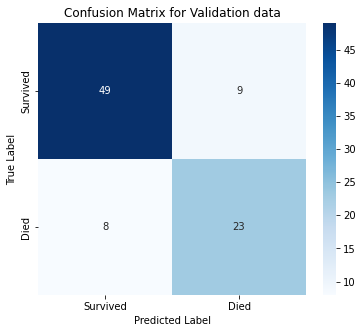

In [36]:
linear_svm.evaluate(DataFlag="Validation")

Evaluating the model's performance for Test dataset
Predicting target varaibles using the features provided
Accuracy:  0.7865168539325843
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.74      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178

Confusion Matrix: 
 [[92 17]
 [21 48]]
Roc Score :  0.769844435580375


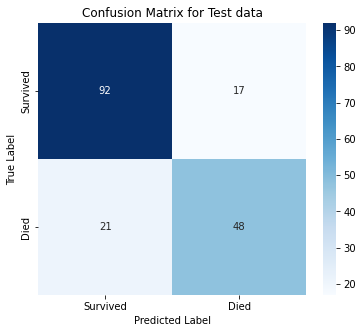

In [37]:
linear_svm.evaluate(DataFlag="Test")

In [38]:
gs=GridSearch()
gs_result=gs.tune_linear_svm(linear_svm.model,linear_svm.validation_features,linear_svm.validation_targets)

Best Parameters: {'C': 1}
Best Validation Accuracy: 0.8071895424836601


In [39]:
bs=BayesianSearch(n_iter=100)
bs_result=bs.tune_linear_svm(linear_svm.model,linear_svm.validation_features,linear_svm.validation_targets)

print("Grid Search Result : {0}\nBayesian Search Result : {1}".format(gs_result,bs_result))

Best Parameters: OrderedDict([('C', 1.1323641339980388)])
Best Validation Accuracy: 0.818954248366013
Grid Search Result : {'C': 1}
Bayesian Search Result : OrderedDict([('C', 1.1323641339980388)])


In [40]:
linear_svm_optimized=LinearSVMClassifier(C=1.1323641339980388)
linear_svm_optimized.load_train_data()
linear_svm_optimized.load_validation_data()
linear_svm_optimized.load_test_data()

Splitting training data into features and target variables
Splitting validation data into features and target variables
Splitting testing data into features and target variables


In [41]:
linear_svm_optimized.train()

Training the model with training data set


Evaluating the model's performance for Validation dataset
Predicting target varaibles using the features provided
Accuracy:  0.8089887640449438
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        58
           1       0.72      0.74      0.73        31

    accuracy                           0.81        89
   macro avg       0.79      0.79      0.79        89
weighted avg       0.81      0.81      0.81        89

Confusion Matrix: 
 [[49  9]
 [ 8 23]]
Roc Score :  0.7933815350389322


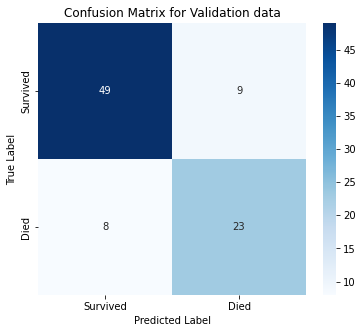

In [42]:
linear_svm_optimized.evaluate(DataFlag="Validation")

Evaluating the model's performance for Test dataset
Predicting target varaibles using the features provided
Accuracy:  0.7865168539325843
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       109
           1       0.74      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.79      0.79       178

Confusion Matrix: 
 [[92 17]
 [21 48]]
Roc Score :  0.769844435580375


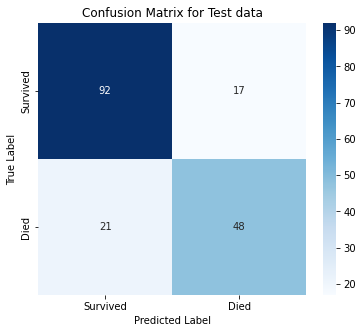

In [43]:
linear_svm_optimized.evaluate(DataFlag="Test")